## Exploratory Data Analysis (EDA)

In [116]:
import pandas as pd

In [117]:
df_contracts = pd.read_csv("./datasets/churn_contracts.csv")
df_contracts.head(5)

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [118]:
df_contracts.tail(5)

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,24,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,66,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [119]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


In [120]:
df_contracts["TotalCharges"].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [121]:
df_contracts["TotalCharges"] = pd.to_numeric(df_contracts["TotalCharges"], errors="coerce")
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


In [122]:
df_contracts["TotalCharges"].describe() # non-null

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [123]:
df_customers = pd.read_csv("./datasets/churn_customers.csv")
df_customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [124]:
df_services = pd.read_csv("./datasets/churn_services.csv")
df_services.head()

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No


In [125]:
print(len(df_contracts))
print(len(df_customers))
print(len(df_services))

7043
7043
7043


In [126]:
df_temp = df_contracts.merge(df_customers, on="customerID")
df_temp.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [127]:
df_final = df_temp.merge(df_services, on="customerID")
df_final.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,...,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,...,No,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No,Male,0,...,No,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,...,No,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,...,No,Yes,No,Fiber optic,No,No,No,No,No,No


In [128]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  PhoneService      7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Not Available Values

In [129]:
df_final.isna().sum()

customerID           0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [130]:
# not available lines
df_final[df_final.isna().any(axis=1)]

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,...,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,4472-LVYGI,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,Female,0,...,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,0,Two year,No,Mailed check,20.25,NaN,No,Male,0,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
936,5709-LVOEQ,0,Two year,No,Mailed check,80.85,NaN,No,Female,0,...,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,0,Two year,No,Mailed check,25.75,NaN,No,Male,0,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1340,1371-DWPAZ,0,Two year,No,Credit card (automatic),56.05,NaN,No,Female,0,...,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,0,Two year,No,Mailed check,19.85,NaN,No,Male,0,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3826,3213-VVOLG,0,Two year,No,Mailed check,25.35,NaN,No,Male,0,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4380,2520-SGTTA,0,Two year,No,Mailed check,20.00,NaN,No,Female,0,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5218,2923-ARZLG,0,One year,Yes,Mailed check,19.70,NaN,No,Male,0,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6670,4075-WKNIU,0,Two year,No,Mailed check,73.35,NaN,No,Female,0,...,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No


In [131]:
df_final.fillna(value={"TotalCharges": 0})

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,...,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,...,No,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No,Male,0,...,No,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,...,No,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,...,No,Yes,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,One year,Yes,Mailed check,84.80,1990.50,No,Male,0,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,One year,Yes,Credit card (automatic),103.20,7362.90,No,Female,0,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,...,Yes,No,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Male,1,...,No,Yes,Yes,Fiber optic,No,No,No,No,No,No


In [132]:
# rows TotalCharges == 0
df_final[df_final["TotalCharges"] == 0]

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,...,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [133]:
df_final['TotalCharges'].mean()

2283.3004408418656

In [134]:
df_final.fillna(value={"TotalCharges": df_final['TotalCharges'].mean()})

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,...,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,...,No,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No,Male,0,...,No,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,...,No,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,...,No,Yes,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,One year,Yes,Mailed check,84.80,1990.50,No,Male,0,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,One year,Yes,Credit card (automatic),103.20,7362.90,No,Female,0,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,...,Yes,No,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Male,1,...,No,Yes,Yes,Fiber optic,No,No,No,No,No,No


In [135]:
df_final.dropna(axis=0)

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,...,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,...,No,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No,Male,0,...,No,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,...,No,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,...,No,Yes,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,One year,Yes,Mailed check,84.80,1990.50,No,Male,0,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,One year,Yes,Credit card (automatic),103.20,7362.90,No,Female,0,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,...,Yes,No,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Male,1,...,No,Yes,Yes,Fiber optic,No,No,No,No,No,No


### Hypotheses

- Univariate Analysis
   - Customer age group has a strong association with Churn
   - A customer with less than 6 months of contract is more prone to Churn
   - Customers with a monthly contract are more prone to Churn

In [137]:
df_final["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [139]:
df_final["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

[Text(0, 0, '0.73463'), Text(0, 0, '0.26537')]

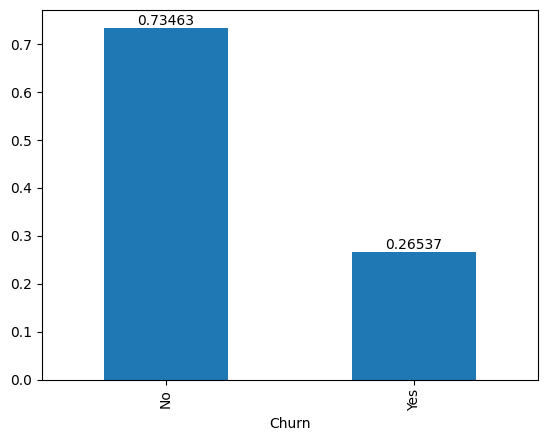

In [141]:
ax = df_final["Churn"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.550192'), Text(0, 0, '0.240664'), Text(0, 0, '0.209144')]

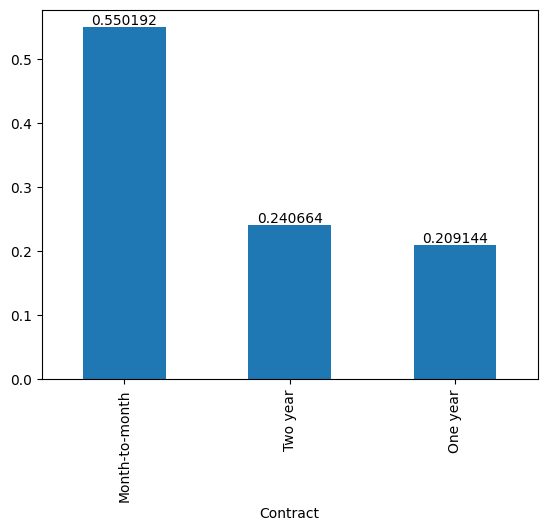

In [142]:
ax = df_final["Contract"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])